In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day'])
    df = df.astype(float)

    return df
def xgboost_model():
    df = pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=400, subsample=0.9)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Assuming your model is named 'model' and is already trained
    xgb.plot_importance(model)
    plt.title("XGBoost Feature Importance")
    plt.show()
    
    
    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    sensitivity = tpr[np.argmax(tpr - fpr)]
    specificity = 1 - fpr[np.argmax(tpr - fpr)]
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    # Optionally, plot feature importances (requires matplotlib)
    xgb.plot_importance(model)
    df1=pd.read_csv('final_dataset.csv')
    df_final=df1[['Day','Holiday', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][4194:4236]
    df_final['Prediction']=y_pred[471:513].astype(int)

    accuracy_f = accuracy_score(y_test[471:513], y_pred[471:513])
    print("Accuracy final:", accuracy_f)

    print(df_final.to_string(index=False))
    df_final.to_csv('tabla_finalsitu2.csv', index=False)
    return df_final

    

def main():
    xgboost_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Accuracy: 0.8143074581430746


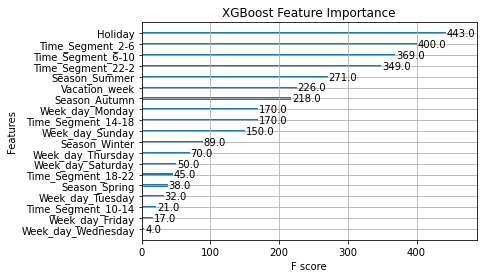

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       326
         1.0       0.78      0.88      0.83       331

    accuracy                           0.81       657
   macro avg       0.82      0.81      0.81       657
weighted avg       0.82      0.81      0.81       657

Confusion Matrix:
[[245  81]
 [ 41 290]]


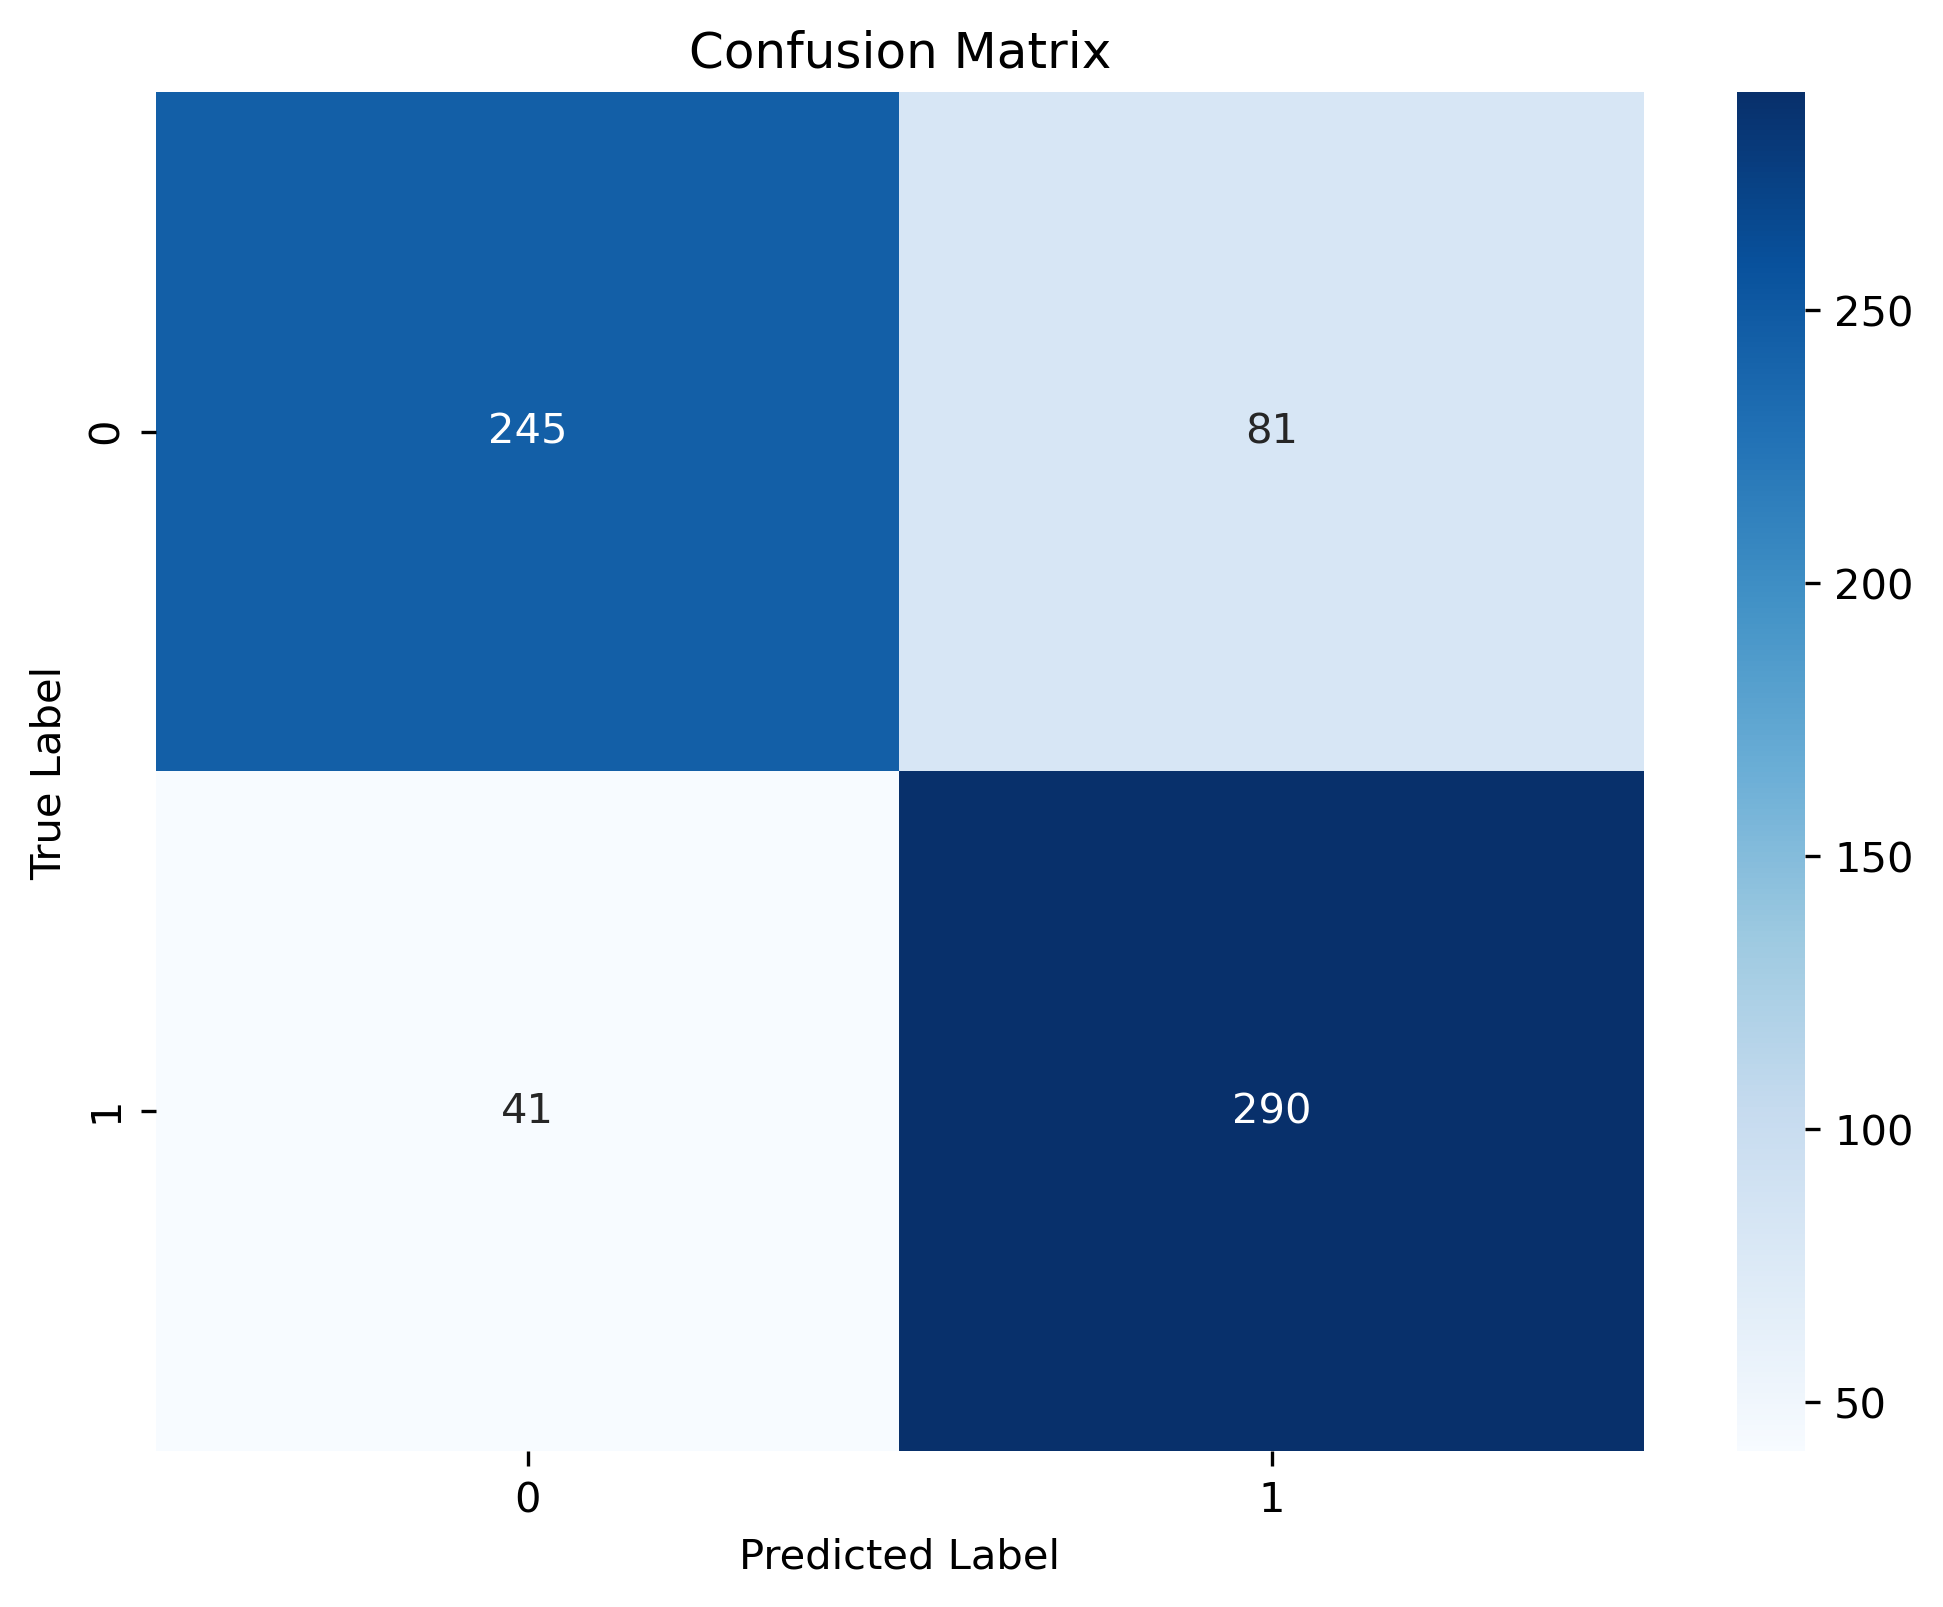

Sensitivity: 0.8761329305135952
Specificity: 0.7515337423312883
Accuracy final: 0.8095238095238095
       Day Holiday Time_Segment Season  Week_day  Vacation_week  Exceeds Threshold  Prediction
2022-12-01      No          2-6 Winter  Thursday              0                  0           0
2022-12-01      No         6-10 Winter  Thursday              0                  1           1
2022-12-01      No        10-14 Winter  Thursday              0                  1           1
2022-12-01      No        14-18 Winter  Thursday              0                  1           1
2022-12-01      No        18-22 Winter  Thursday              0                  1           1
2022-12-01      No         22-2 Winter  Thursday              0                  1           0
2022-12-02      No          2-6 Winter    Friday              0                  0           0
2022-12-02      No         6-10 Winter    Friday              0                  1           1
2022-12-02      No        10-14 Winter    Frid

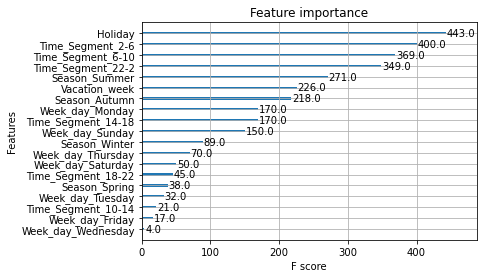

In [3]:
main()

In [4]:
df = pd.read_csv('tabla_finalsitu2.csv')

In [5]:
df

,Day,Holiday,Time_Segment,Season,Week_day,Vacation_week,Exceeds Threshold,Prediction
0,2022-12-01,No,2-6,Winter,Thursday,0,0,0
1,2022-12-01,No,6-10,Winter,Thursday,0,1,1
2,2022-12-01,No,10-14,Winter,Thursday,0,1,1
3,2022-12-01,No,14-18,Winter,Thursday,0,1,1
4,2022-12-01,No,18-22,Winter,Thursday,0,1,1
5,2022-12-01,No,22-2,Winter,Thursday,0,1,0
6,2022-12-02,No,2-6,Winter,Friday,0,0,0
7,2022-12-02,No,6-10,Winter,Friday,0,1,1
8,2022-12-02,No,10-14,Winter,Friday,0,1,1
9,2022-12-02,No,14-18,Winter,Friday,0,1,1


In [6]:
# Para ver las filas 34 y 41
filas_seleccionadas = df.iloc[[22, 34]]
filas_seleccionadas

,Day,Holiday,Time_Segment,Season,Week_day,Vacation_week,Exceeds Threshold,Prediction
22,2022-12-04,Yes,18-22,Winter,Sunday,0,1,0
34,2022-12-06,No,18-22,Winter,Tuesday,1,0,1
